In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore") 

C:\Users\james\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('data.csv')

## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
# Create copy of df
df = data.copy()
# Check Missing data
df.isnull().sum().any()

False

In [7]:
# Shape of df
df.shape

(6819, 96)

In [8]:
df['Bankrupt?'].value_counts()
#only 220 of the 6819 companies are bankrupt

0    6599
1     220
Name: Bankrupt?, dtype: int64

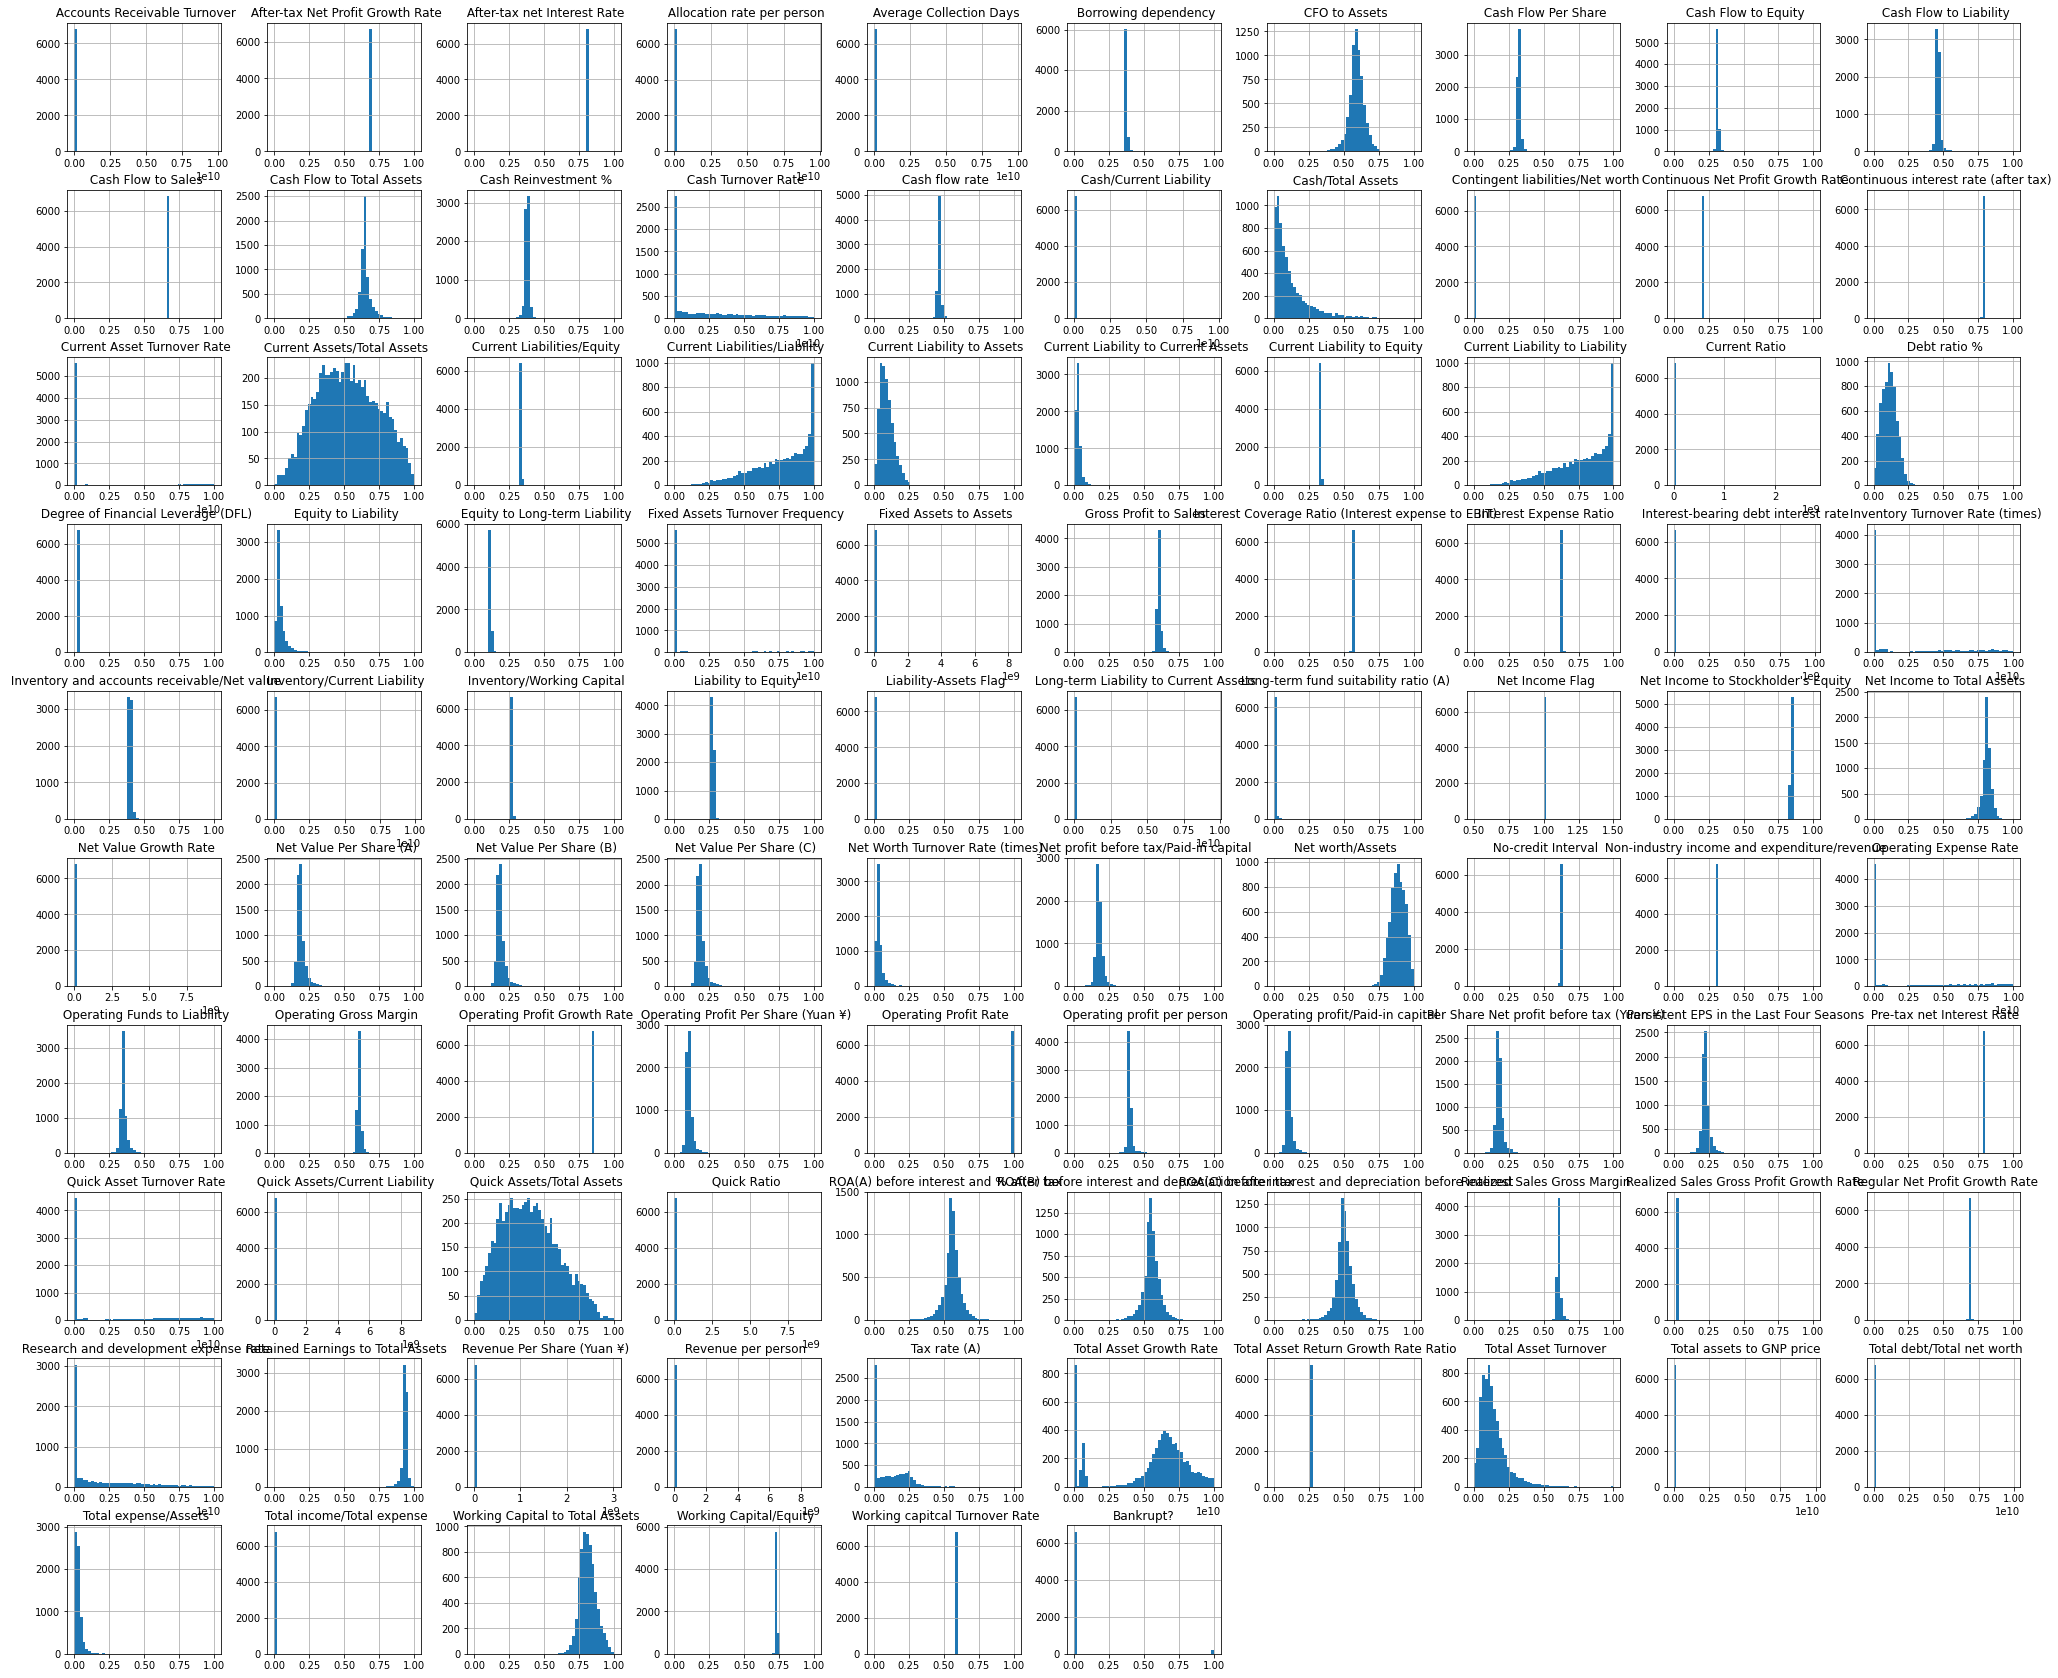

In [9]:
# Looking at the histograms of numerical data
data.hist(figsize = (35,30), bins = 50)
plt.show()

#### The data in the set is fairly clean. There are no missing values. The data is already set in a numerical format. Most features are normally distributed. Few have a significant skew.

## Data Processing

In [10]:
X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

In [11]:
poly = PolynomialFeatures()
poly.fit_transform(X)

array([[1.00000000e+00, 3.70594257e-01, 4.24389446e-01, ...,
        1.00000000e+00, 1.64687409e-02, 2.71219427e-04],
       [1.00000000e+00, 4.64290937e-01, 5.38214130e-01, ...,
        1.00000000e+00, 2.07943063e-02, 4.32403176e-04],
       [1.00000000e+00, 4.26071272e-01, 4.99018753e-01, ...,
        1.00000000e+00, 1.64741143e-02, 2.71396443e-04],
       ...,
       [1.00000000e+00, 4.72724614e-01, 5.33744003e-01, ...,
        1.00000000e+00, 9.76487375e-02, 9.53527593e-03],
       [1.00000000e+00, 5.06264320e-01, 5.59910597e-01, ...,
        1.00000000e+00, 4.40094472e-02, 1.93683144e-03],
       [1.00000000e+00, 4.93053186e-01, 5.70104666e-01, ...,
        1.00000000e+00, 2.33902238e-01, 5.47102569e-02]])

## Feature Selection

In [12]:
#Sort columns from the less correlated to the most correlated
df_corr = df.corr()
df_corr = df_corr.reindex(df_corr["Bankrupt?"].abs().sort_values(ascending=True).index).T
column_names = np.array(df_corr.columns)
df= df.reindex(columns=column_names)

<AxesSubplot:>

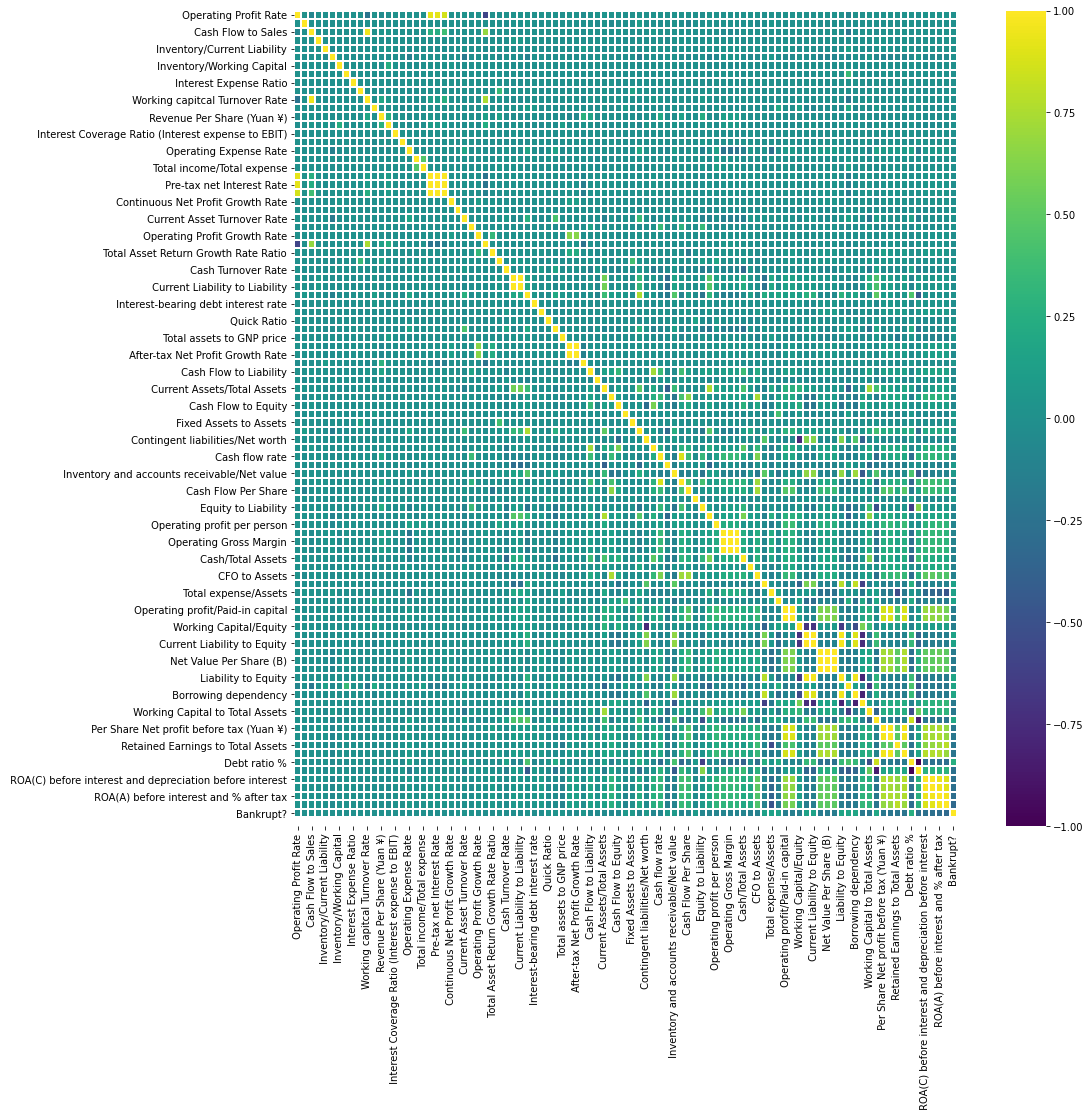

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

In [14]:
#Isolate the input features which have a high correlation between themselves
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X, 0.65)
display(len(corr_features))

35

In [15]:
X.drop(corr_features, axis=1, inplace=True)
df.drop(corr_features,axis=1, inplace=True)
df.head()

,Operating Profit Rate,Realized Sales Gross Profit Growth Rate,Long-term Liability to Current Assets,Inventory/Current Liability,Inventory Turnover Rate (times),Inventory/Working Capital,Current Ratio,Interest Expense Ratio,Allocation rate per person,Quick Assets/Current Liability,...,Total expense/Assets,Liability-Assets Flag,Net Value Per Share (B),Current Liability to Current Assets,Borrowing dependency,Working Capital to Total Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Bankrupt?,Net Income Flag
0,0.998969,0.022102,0.025592,0.001036,1.820926e-04,0.276920,0.002259,0.629951,0.037135,0.001997,...,0.064856,0,0.147950,0.118250,0.390284,0.672775,0.207576,0.370594,1,1
1,0.998946,0.022080,0.023947,0.005210,9.360000e+09,0.289642,0.006016,0.635172,0.012335,0.004136,...,0.025516,0,0.182251,0.047775,0.376760,0.751111,0.171176,0.464291,1,1
2,0.998857,0.022760,0.003715,0.013879,6.500000e+07,0.277456,0.011543,0.629631,0.141016,0.006302,...,0.021387,0,0.177911,0.025346,0.379093,0.829502,0.207516,0.426071,1,1
3,0.998700,0.022046,0.022165,0.003540,7.130000e+09,0.276580,0.004194,0.630228,0.021320,0.002961,...,0.024161,0,0.154187,0.067250,0.379743,0.725754,0.151465,0.399844,1,1
4,0.998973,0.022096,0.000000,0.004869,1.633674e-04,0.287913,0.006022,0.636055,0.023988,0.004275,...,0.026385,0,0.167502,0.047725,0.375025,0.751822,0.106509,0.465022,1,1


# Scaling

In [16]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

# Modeling

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [18]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [31]:
#Create random classifier line for ROC and precision/recall curves
rnd_probs = [0 for _ in range(len(y_train))]
# calculate scores
rnd_auc = roc_auc_score(y_train, rnd_probs)
# calculate roc curves
rnd_fpr, rnd_tpr, _ = roc_curve(y_train, rnd_probs)
# calculate the random classifier line as the proportion of the positive class
rnd = len(y_train[y_train==1]) / len(y_train)

In [19]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [45]:
def modelfit(alg, X_train, X_test, y_train, performCV=True, printFeatureImportance=True, cv_folds=kfold):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    predictions = alg.predict(X_test)
    predprob = alg.predict_proba(X_test)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("F1 Score : %.4g" % f1_score(y_test.values, predictions, average='weighted'))
    print ("AUC Score (Train): %f" % roc_auc_score(y_test, predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))) 
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X_train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

# Random Forest

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)
random_f1 = f1_score(y_test, y_preds, average='weighted')
print('Random Forest: F1_Score=%.3f' % (random_f1))

Random Forest: F1_Score=0.956


In [22]:
param_grid =  {'n_estimators':[100, 200, 300],
               'criterion':['gini','entropy'],
               'max_depth': [10, 20, None],
               'max_features': ['auto','sqrt', 10]
              }
                                  
rf_search = GridSearchCV(rf,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 1, verbose = 1)

rf_search.fit(X_train,y_train)

best_rf = rf_search.best_estimator_

# Best score
rf_search.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 19.3min finished


0.9719528178243774


Model Report
F1 Score : 0.9555
AUC Score (Train): 0.942313
CV Score : Mean - 0.9291549 | Std - 0.03157543 | Min - 0.8707665 | Max - 0.9692761


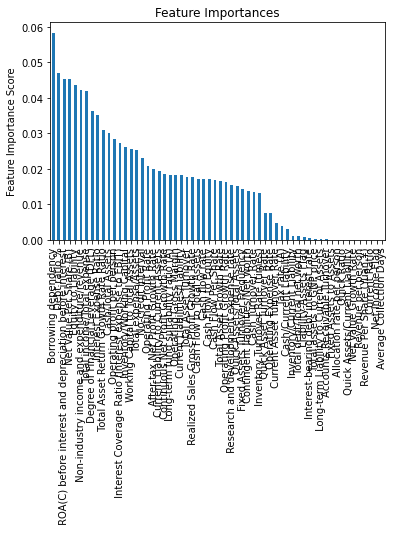

In [46]:
modelfit(best_rf, X_train, X_test, y_train)

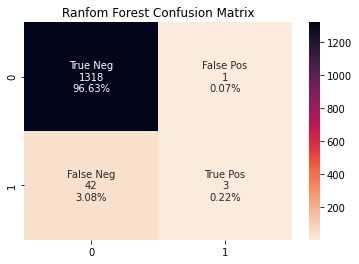

In [55]:
y_preds = best_rf.predict(X_test)
rf_matrix = confusion_matrix(y_test, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in rf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in rf_matrix.flatten()/np.sum(rf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rf_matrix, annot=labels, fmt='', cmap='rocket_r')
plt.title('Ranfom Forest Confusion Matrix')
plt.show()

#### The random forest will be a good predictor of bankruptcies. The random forest classifier produced less than 3.5% errors against an unseen test set. The random forest model has found that the most important in determining bank

# Gradient Boost

In [24]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_preds = gbc.predict(X_test)
gbc_f1 = f1_score(y_test, y_preds, average='weighted')
print('Gradient Boost: F1_Score=%.3f' % (gbc_f1))

Gradient Boost: F1_Score=0.954


In [25]:
#Search grid for optimal parameters
param_grid = {'loss':['deviance', 'exponential'],
              'n_estimators' : [100,200,300],
              'max_depth': [10, 20, None],
              'max_features': ['auto', 'sqrt', 10] 
              }

gbc_search = GridSearchCV(gbc,param_grid = param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gbc_search.fit(X_train,y_train)

best_gbc = gbc_search.best_estimator_

# Best score
gbc_search.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 1445.8min finished


0.9715861814026951


Model Report
F1 Score : 0.9551
AUC Score (Train): 0.935498
CV Score : Mean - 0.9330969 | Std - 0.03121509 | Min - 0.8746101 | Max - 0.9668561


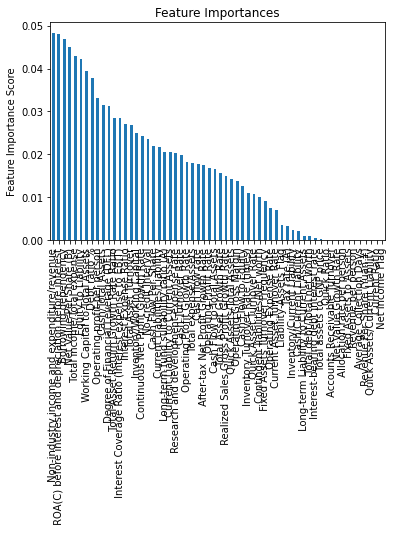

In [47]:
modelfit(best_gbc, X_train, X_test, y_train)

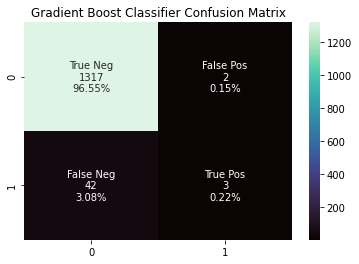

In [56]:
y_preds = best_gbc.predict(X_test)
gbc_matrix = confusion_matrix(y_test, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in gbc_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in gbc_matrix.flatten()/np.sum(gbc_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(gbc_matrix, annot=labels, fmt='', cmap='mako')
plt.title('Gradient Boost Classifier Confusion Matrix')
plt.show()

#### The gradient boost model performed slightly worse than the random forest classifier. The model accurately selected over 96% true results with few false negatives and false posititves against the unseen test set.

# Extra Trees

In [27]:
ext = ExtraTreesClassifier()
ext.fit(X_train, y_train)
y_preds = rf.predict(X_test)
ext_f1 = f1_score(y_test, y_preds, average='weighted')
print('Extra Trees: F1_Score=%.3f' % (ext_f1))

Extra Trees: F1_Score=0.956


In [28]:
#Search grid for optimal parameters
param_grid = {"max_depth": [10,20,None],
              "max_features": ['auto', 'sqrt', 10],
              "n_estimators" :[100,300],
              "criterion": ['gini', 'entropy']}


ext_search = GridSearchCV(ext,param_grid = param_grid, cv=kfold, scoring="accuracy", verbose = 1)

ext_search.fit(X_train, y_train)

best_ext = ext_search.best_estimator_

# Best score
ext_search.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.1min finished


0.9706700944315623


Model Report
F1 Score : 0.9526
AUC Score (Train): 0.917960
CV Score : Mean - 0.9274962 | Std - 0.02822754 | Min - 0.8618538 | Max - 0.9634891


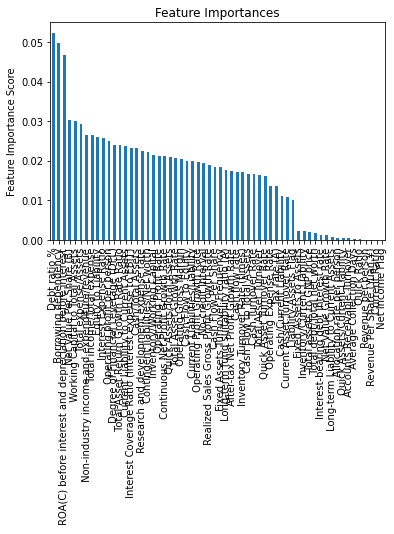

In [51]:
modelfit(best_ext, X_train, X_test, y_train)

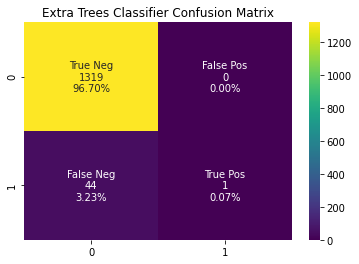

In [57]:
y_preds = best_ext.predict(X_test)
ext_matrix = confusion_matrix(y_test, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in ext_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in ext_matrix.flatten()/np.sum(ext_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(ext_matrix, annot=labels, fmt='', cmap='viridis')
plt.title('Extra Trees Classifier Confusion Matrix')
plt.show()

#### Extra Trees has the worse performance of the models. While it has determined that debt ratio is the most important factor to determine bankruptcy.

# Ensemble

In [30]:
votingC = VotingClassifier(estimators=[('rf', best_rf), ('gbc',best_gbc),('ext', best_ext)], voting='soft')
votingC.fit(X_train, y_train)
y_preds = votingC.predict(X_test)
vc_f1 = f1_score(y_test, y_preds, average='weighted')
print('Voting Classifier: F1_Score=%.3f' % (vc_f1))

Voting Classifier: F1_Score=0.957


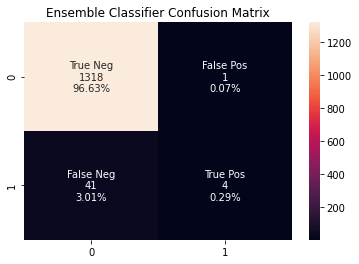

In [59]:
y_preds = votingC.predict(X_test)
votingC_matrix = confusion_matrix(y_test, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in votingC_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in votingC_matrix.flatten()/np.sum(votingC_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(votingC_matrix, annot=labels, fmt='')
plt.title('Ensemble Classifier Confusion Matrix')
plt.show()

#### The ensemble perfomed only slightly better than the other models seperately. 